## Import data

In [48]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [49]:
dims = pd.read_excel("6-dimensions-for-website-2015-08-16.xls")
print("Nb lignes : ",len(dims.index))
dims = dims.dropna()
dims = dims.drop([0,1,5])
#supprimer regions
print("Nb lignes filtrées : ",len(dims.index))
print("Index : ",dims.columns)
print(dims.head(10))

Nb lignes :  111
Nb lignes filtrées :  62
Index :  Index(['ctr', 'country', 'pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr'], dtype='object')
    ctr     country   pdi   idv   mas   uai     ltowvs        ivr
6   ARG   Argentina  49.0  46.0  56.0  86.0  20.403023  61.830357
8   AUL   Australia  38.0  90.0  61.0  51.0  21.158690  71.428571
9   AUT     Austria  11.0  55.0  79.0  70.0  60.453401  62.723214
11  BAN  Bangladesh  80.0  20.0  55.0  60.0  47.103275  19.642857
13  BEL     Belgium  65.0  75.0  54.0  94.0  81.863980  56.696429
17  BRA      Brazil  69.0  38.0  49.0  76.0  43.828715  59.151786
18  BUL    Bulgaria  70.0  30.0  40.0  85.0  69.017632  15.848214
20  CAN      Canada  39.0  80.0  52.0  48.0  36.020151  68.303571
22  CHL       Chile  63.0  23.0  28.0  86.0  30.982368  68.000000
23  CHI       China  80.0  20.0  66.0  30.0  87.405542  23.660714


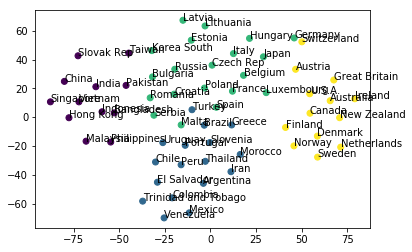

In [56]:
pca = TSNE(n_components=2,random_state=0)
X = dims[['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr']]
y = dims["country"]
mat = pca.fit_transform(X,y)
model = SpectralClustering(n_clusters=4,assign_labels="discretize",affinity='nearest_neighbors',random_state=0)
clust_labels = model.fit_predict(X)
#clust_labels = model.predict(X)
#cent = model.cluster_centers_
plt.scatter(mat[:,0],mat[:,1],c=clust_labels)
for i, txt in enumerate(y):
    plt.annotate(txt, (mat[i,0], mat[i,1]))

In [57]:
p = figure(title = "Clustering")
#p.xaxis.axis_label = 'Petal Length'
#p.yaxis.axis_label = 'Petal Width'
colors = ["red","blue","green","yellow"]
source = ColumnDataSource(data={"x":mat[:,0], "y":mat[:,1], "label":y, "color":list([colors[i] for i in clust_labels])})

p.circle(x="x",y="y",color="color", source=source, fill_alpha=0.2, size=10)

labels = LabelSet(x="x",y="y",source=source, text="label", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  text_align='center')
p.add_layout(labels)

#output_file("iris.html", title="iris.py example")

show(p)